In [29]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.2 MB/s eta 0:00:00


MODEL OLUŞTURMAK İÇİN:

In [30]:
import mglearn

w[0]: 0.393906  b: -0.031804


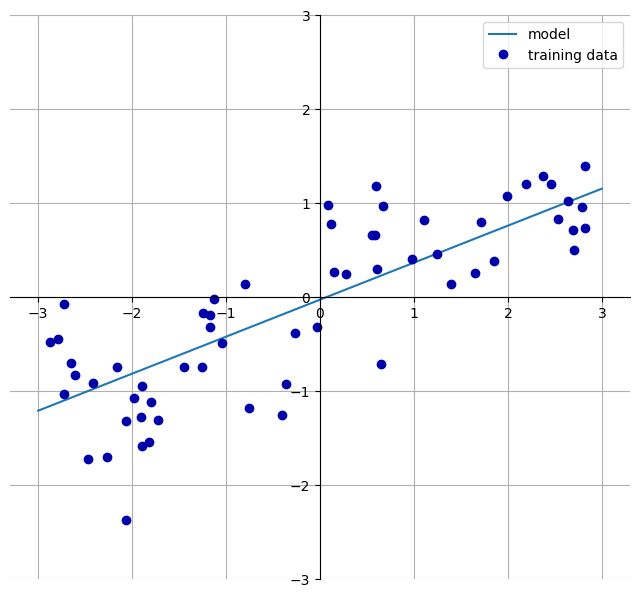

In [31]:
mglearn.plots.plot_linear_regression_wave()

In [37]:
from sklearn.linear_model import LinearRegression

In [41]:
import mglearn
X,y=mglearn.datasets.make_wave(n_samples=60)

In [42]:
from sklearn.model_selection import train_test_split

In [35]:
X_egitim, X_test, y_egitim, y_test=train_test_split(X,y,random_state=42)

In [43]:
lr=LinearRegression()

In [44]:
lr.fit(X_egitim,y_egitim)

LinearRegression()

In [45]:
lr.coef_

array([0.39390555])

In [46]:
lr.intercept_

-0.031804343026759746

In [51]:
abc=lr.score(X_egitim,y_egitim)
print(f"egitim R^2 degeri : {abc:.5f}")

egitim R^2 degeri : 0.67009


In [52]:
bca=lr.score(X_test,y_test)
print(f"test R^2 degeri : {bca:.5f}")

test R^2 degeri : 0.65934


In [3]:
import pandas as pd
from google.colab import files
upload=files.upload()

Saving student-mat.csv to student-mat.csv


In [4]:
veri=pd.read_csv("student-mat.csv",sep=";")
veri.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
veri.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
veri=veri[["G1","G2","G3","studytime","failures","absences","age"]]
veri.head()

,G1,G2,G3,studytime,failures,absences,age
0,5,6,6,2,0,6,18
1,5,5,6,2,0,4,17
2,7,8,10,2,3,10,15
3,15,14,15,3,0,2,15
4,6,10,10,2,0,4,16


In [8]:
veri.rename(columns={"G1":"sınav1",
"G2":"sınav2",
"G3":"final",
"studytime":"calısma saati","failures":"sıçış","absences":"devamsızlık","age":"yaş"},inplace=True)

In [9]:
veri.head(5)

,sınav1,sınav2,final,calısma saati,sıçış,devamsızlık,yaş
0,5,6,6,2,0,6,18
1,5,5,6,2,0,4,17
2,7,8,10,2,3,10,15
3,15,14,15,3,0,2,15
4,6,10,10,2,0,4,16


BURADA X VE Y OLARAK BAĞIMLI BAĞIMSIZ DEĞİŞKENLERİ YAZIYORUZ

In [10]:
import numpy as np
X=np.array(veri["final"]).reshape(-1,1) #Burada bağımlı değişkeni aldık "G3" Final notumuz
y=np.array(veri.drop("final",axis=1)) #Burada da G3 final notunu silerek,geriye kalan bağımsız değişkenleri aldık.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #Random state denilen dümen her seferin train_test_split kullandıgında aynı bölme yapılsın her seferinde farklı deger cıkarmasın diye.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

OVERFİTTİNG:Overfitting (Aşırı öğrenme), modelin eğitim verisine çok iyi uyup, test verisinde başarısız olmasıdır. UNDERFİTTİNG:Underfitting (Eksik öğrenme), modelin hem eğitim hem de test verisinde düşük performans göstermesi durumudur.

In [15]:
linear.score(X_test,y_test)  #Normalde daha yüksek çıkması lazımdı neden böyle çıktı anlayamadım

0.24716457342019518

In [16]:
linear.score(X_train,y_train) #Burasıda çok düşük çıktı ayrıca degerler birbirine yakın. Ayrıca degerlere baktıgımızda modelin iyi öğrenemediğini yorumlayabiliriz.

0.27254236774685586

In [17]:
print("katsayılar : \n",linear.coef_)
print("sabit değişken : \n",linear.intercept_)

katsayılar : 
 [[ 0.55470965]
 [ 0.7428864 ]
 [ 0.02517704]
 [-0.05989529]
 [ 0.11853666]
 [-0.0404672 ]]
sabit değişken : 
 [ 5.20564053  2.98089135  1.78749153  0.95391878  4.6810597  17.16153315]


In [18]:
veri.head()

,sınav1,sınav2,final,calısma saati,sıçış,devamsızlık,yaş
0,5,6,6,2,0,6,18
1,5,5,6,2,0,4,17
2,7,8,10,2,3,10,15
3,15,14,15,3,0,2,15
4,6,10,10,2,0,4,16


BURADA DEĞERLERİM BERBAT ÇIKTIGI İÇİN BAŞKA ŞEYLER DENEDİM


In [23]:
print(f"Model {linear.n_features_in_} özellik ile eğitildi.")

Model 1 özellik ile eğitildi.


In [25]:
X_train = np.array(veri.drop("final", axis=1))
y_train = np.array(veri["final"])

linear = LinearRegression()
linear.fit(X_train, y_train)
print(f"Model {linear.n_features_in_} özellik ile eğitildi.")

Model 6 özellik ile eğitildi.


In [27]:
yeni = np.array([[10, 14, 3, 0, 4, 16]])
tahmin = linear.predict(yeni)
print(tahmin)

[13.38054795]


BU SEFER DAHA DOĞRU ÇIKTI GİBİ